In [18]:
import sys
# Sorry for this code : (
sys.path.append('../')

import os
import numpy as np
from matplotlib import pyplot as plt
from settings import Params

def load_experiment(name, newest=False):
    core = 0
    batch = 0

    if newest:
        children = os.listdir("../hearts/"  )
        
        new_name = None
        suffix = -1
        for child in children:
            child_name = child.split("-")

            if len(child_name) == 1:
                if new_name is None:
                    new_name = child_name
                    suffix = 0
                continue

            child_suffix = int(child_name[1])
            if child_name[0] == name and child_suffix > suffix:
                new_name = child
                suffix = child_suffix
        
        if new_name is None:
            raise ValueError(f"Heart wiht name {name} does not exist")
        
        name = new_name
        

    par = Params(f"../hearts/{name}/params.json")
    t_start = par.get("t_start")
    t_end = par.get("t_end")

    states = np.load(f"../hearts/{name}/data/states_{core}_{batch}.npy")
    actions = np.load(f"../hearts/{name}/data/actions_{core}_{batch}.npy")

    return states, actions, t_start, t_end, par, name


In [17]:
"wadwdwdawd".split("-")

['wadwdwdawd']

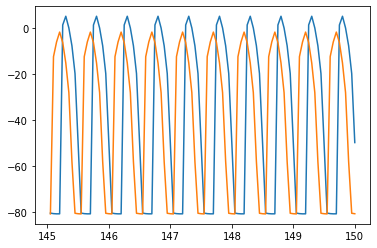

In [7]:
states, actions, t_start, t_end, par, _ = load_experiment("disturbed_new")

uProbes = states
probeUndisturbed = states.T[1]
t = np.linspace(t_start, t_end, num=probeUndisturbed.size) / 1000

indicies = t > 145

plt.plot(t[indicies], states.T[1][indicies])
plt.plot(t[indicies], states.T[0][indicies])

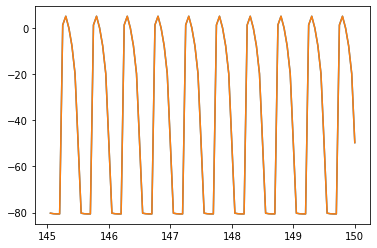

In [14]:
states, actions, t_start, t_end, par, _ = load_experiment("non_disturbed_new")

dProbes = states
probeDisturbed = states.T[1]
t = np.linspace(t_start, t_end, num=probeDisturbed.size) / 1000

indicies = t > 145

plt.plot(t[indicies], probeDisturbed[indicies])
plt.plot(t[indicies], probeUndisturbed[indicies])

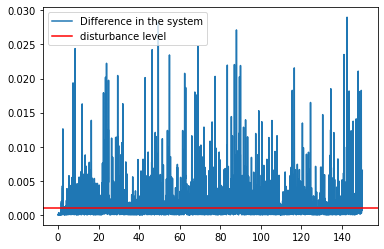

In [13]:
diffs = np.linalg.norm(dProbes - uProbes, axis=1)

N = 1
diffs_mean = np.convolve(diffs, np.ones(N)/N, mode='sane')

t = np.linspace(t_start, t_end, num=diffs.size) / 1_000
#plt.plot(t, diffs, label="actual")
plt.plot(t, diffs, label="Difference in the system")
plt.axhline(1e-3, color="red", label="disturbance level")
plt.legend()


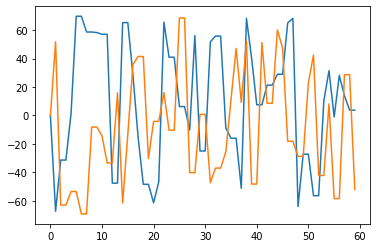

In [3]:
states, actions, t_start, t_end, par = load_experiment("rectnoise-3")

plt.plot(actions)

In [25]:
actions

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])